In [59]:
import openai
from dotenv import dotenv_values
import requests
import os

In [64]:
config = dotenv_values(".env")
openai.api_key = config["OPENAI_API_KEY"]

In [28]:
# Generate an image with OpenAI's DALL-E 3. Return value is an image URL.
res = openai.images.generate(
    model = "dall-e-3",
    prompt = """Create an image for a skier pulled by a horse. Include both the horse and the skier in the picture in full.
                The skier should look like a Mongolian person from 100 years ago. He should be skiing in the snow, pulled by a horse, 
                not being on horseback.""",
    n=1
)
image_url = res.data[0].url

In [29]:
image_url

'https://oaidalleapiprodscus.blob.core.windows.net/private/org-oslhQ7rMcIVtGIgEiuu4mICT/user-xgNTA7odXdcYrVt2Oj30ir3u/img-t9flZ70gyVb8JsZXwaETRLPV.png?st=2024-06-04T15%3A46%3A06Z&se=2024-06-04T17%3A46%3A06Z&sp=r&sv=2023-11-03&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-06-04T15%3A26%3A52Z&ske=2024-06-05T15%3A26%3A52Z&sks=b&skv=2023-11-03&sig=UC48ME1UK/mjHs%2Bs7s%2BjCfVWVD3W7rZH0AvJs4pdLjg%3D'

In [30]:
# Save the image url into the current directory's 'images' folder.
image_directory_name = "images"
image_directory = os.path.join(os.curdir, image_directory_name)
if not os.path.isdir(image_directory):
    os.mkdir(image_directory)

image_filepath = os.path.join(image_directory, "horse-skier.png")
image_content = requests.get(image_url).content
with open(image_filepath, "wb") as image_file:
    image_file.write(image_content)

In [39]:
from IPython.display import Image

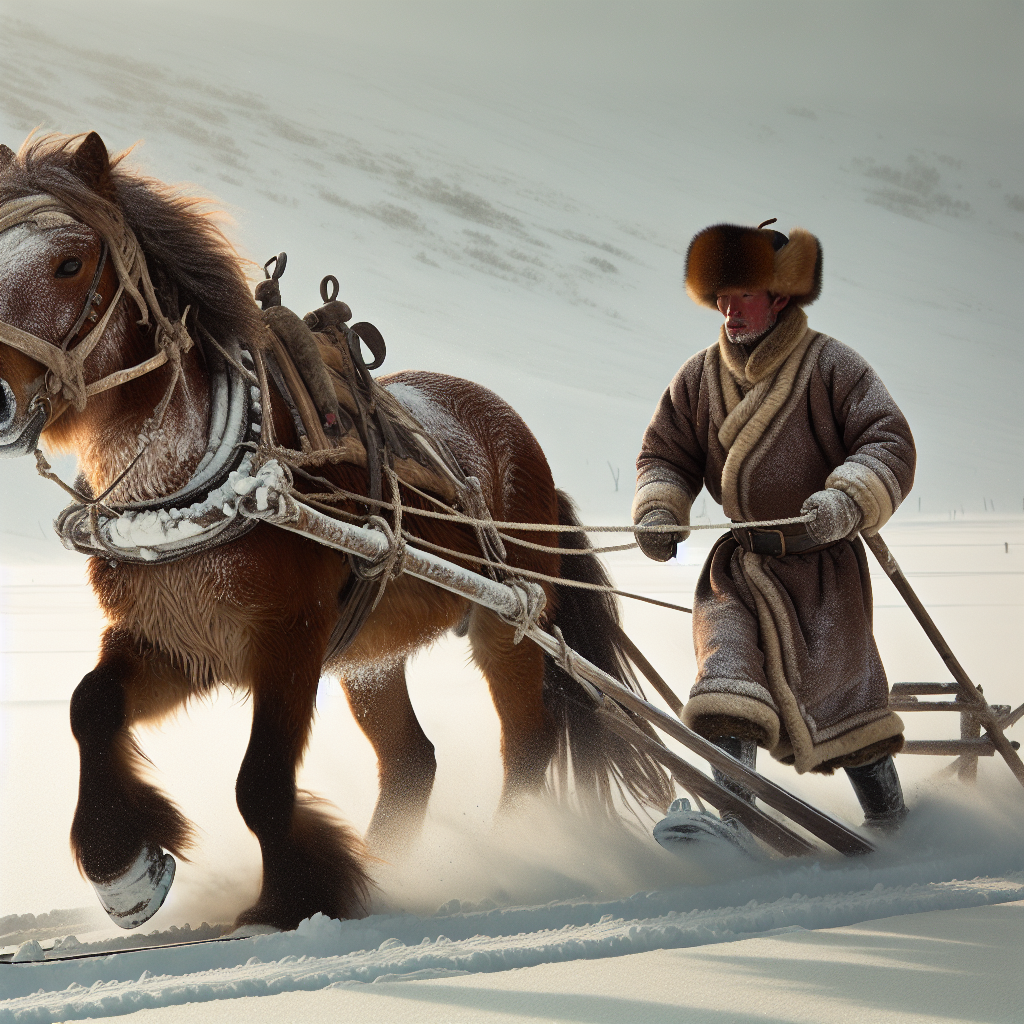

In [40]:
Image(filename=image_filepath)

In [41]:
import base64

In [61]:
# Generate an image with OpenAI's DALL-E 3 with a return value of b64_json. Save the image into the current directory's 'images' folder.
def get_and_save_image(prompt, image_name):
    res = openai.images.generate(
        model = "dall-e-3",
        prompt = prompt,
        n=1,
        response_format="b64_json"
        )
    image_data = res.data[0].b64_json

    image_directory_name = "images"
    image_directory = os.path.join(os.curdir, image_directory_name)
    if not os.path.isdir(image_directory):
        os.mkdir(image_directory)

    image_filepath = os.path.join(image_directory, image_name)

    decoded_img = base64.b64decode(image_data)

    with open(image_filepath, "wb") as f:
        f.write(decoded_img)
    

In [63]:
res = get_and_save_image("""Create a wintery photo image for a horse and a skier. Include both the horse and the skier in the picture in full.
                The horse should run fast and pull the skier behind him with ropes. The horse should not be on skis. 
                The skier should look like a Mongolian person from 100 years ago. The photo should look like it's 30 years old.""",
                  "skijoer6.png")